<a href="https://colab.research.google.com/github/ananyanivarthi/HEALTHCARE/blob/main/REGULARIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_moons


In [2]:
moon= make_moons(n_samples=100, noise=0.15)
x, y = moon

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

In [6]:
model.compile(optimizer=Adam(), loss='mean_squared_error')

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, batch_size=32, verbose=0)

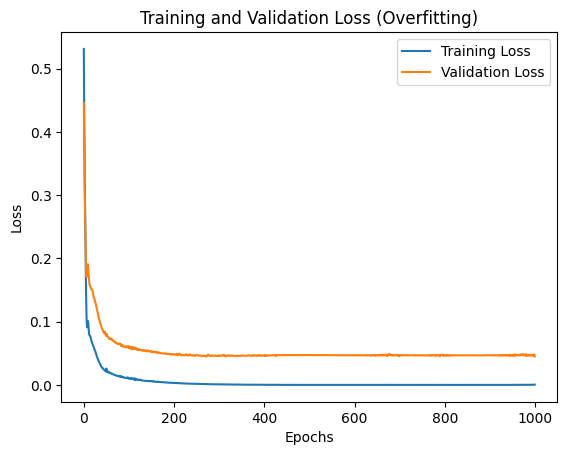

In [8]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Overfitting)')
plt.legend()
plt.show()

In [9]:
from tensorflow.keras.regularizers import l1, l2

In [10]:
model_l1 = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l1(0.001), input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(32, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(1)
])

In [11]:
model_l1.compile(optimizer=Adam(), loss='mean_squared_error')

In [12]:
history_l1 = model_l1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, verbose=0)

In [13]:
model_l2 = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1)
])

In [14]:
model_l2.compile(optimizer=Adam(), loss='mean_squared_error')

In [15]:
history_l2 = model_l2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, verbose=0)

In [16]:
#L1 REGULARIZATION

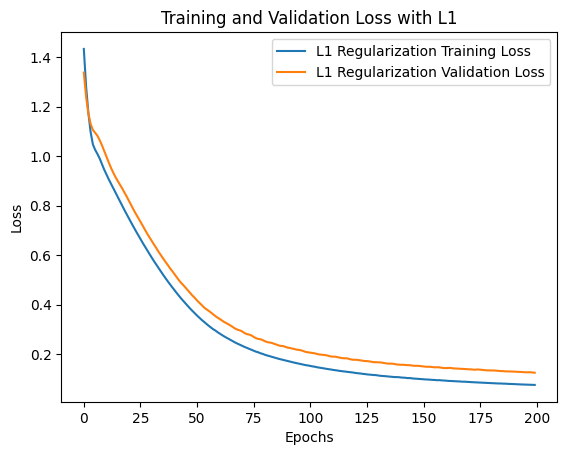

In [17]:
plt.plot(history_l1.history['loss'], label='L1 Regularization Training Loss')
plt.plot(history_l1.history['val_loss'], label='L1 Regularization Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss with L1')
plt.legend()
plt.show()

In [18]:
#L2 REGULARIZATION

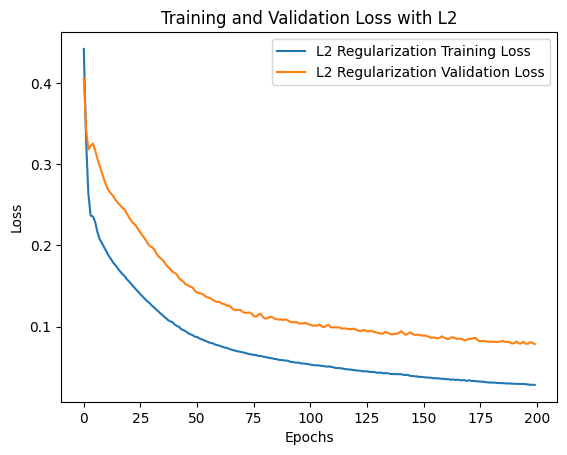

In [19]:
plt.plot(history_l2.history['loss'], label='L2 Regularization Training Loss')
plt.plot(history_l2.history['val_loss'], label='L2 Regularization Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss with L2')
plt.legend()
plt.show()